In [304]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
from os import getenv
from openai import OpenAI
import pathlib
import textwrap
import google.generativeai as genai
import time

load_dotenv("../.env",override=True)
GOOGLE_API_KEY = getenv("GEMINI_API_KEY")
OPENAI_API_KEY = getenv("OPENAI_API_KEY")

df = pd.read_csv("./output/data.csv")
df = df[df["num employees"]=="1-10"]
df


,Unnamed: 0,organization name,num employees,founded date,description,industries,headquarters location,description.1,cb rank,postal code,...,email,hub tag,phone num,num of sub org,industry groups,total funding amt,company type,estimated rev,description_all,industries_parsed
0,0,NLSQL,1-10,2018-11-30,NLSQL Allows anyone to easily make data-driven...,"Analytics, Artificial Intelligence (AI), Big D...","London, England, United Kingdom","NLSQL is cognitive BI technology, which helps ...","382,585",N2 9ED,...,denis@nlsql.com,—,—,—,"Artificial Intelligence (AI), Data and Analyti...",—,For Profit,—,NLSQL Allows anyone to easily make data-driven...,"['Analytics', 'Big Data', 'Information Technol..."
13,13,Babbly,1-10,2018-12-01,Babbly is building the world's largest data pl...,"Artificial Intelligence (AI), Software","Toronto, Ontario, Canada",Babbly offers an AI-powered platform to track ...,"38,001",—,...,hello@babbly.co,6475302934,—,—,"Artificial Intelligence (AI), Data and Analyti...","$2,679,521",For Profit,$1M to $10M,Babbly is building the world's largest data pl...,['Software']
17,17,Hefring Marine,1-10,2018-12-01,Hefring Marine is an Icelandic data-driven dee...,"Autonomous Vehicles, Internet of Things, Marin...","Reykjavík, Gullbringusysla, Iceland",An Icelandic deep-tech company building AI to ...,"67,583",101,...,info@hefringmarine.com,00354-620-3800,—,—,"Internet Services, Science and Engineering, So...","€2,271,429",For Profit,Less than $1M,Hefring Marine is an Icelandic data-driven dee...,"['Autonomous Vehicles', 'Internet of Things', ..."
18,18,foodforecast,1-10,2018-12-01,AI supported solution to reduce food waste.,"Artificial Intelligence (AI), Bakery, Food and...","Cologne, Nordrhein-Westfalen, Germany",IT Software using Artificial Intelligence,"67,638",—,...,info@foodforecast.com,—,—,—,"Artificial Intelligence (AI), Data and Analyti...","€500,000",For Profit,—,AI supported solution to reduce food waste. IT...,"['Bakery', 'Food and Beverage', 'Machine Learn..."
19,19,Volan Technology,1-10,2018-12-01,Volan Technology is an early stage real-time p...,"Analytics, Artificial Intelligence (AI), Machi...","Hoboken, New Jersey, United States",Volan is a people-positioning SaaS analytics p...,"68,848",07030,...,info@volantechnology.com,551-249-1247,—,—,"Administrative Services, Artificial Intelligen...","$5,525,000",For Profit,$1M to $10M,Volan Technology is an early stage real-time p...,"['Analytics', 'Machine Learning', 'Physical Se..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22625,22625,Geolava,1-10,2024-06-04,Geolava is an AI-powered location intelligence...,"Business Intelligence, Generative AI, Geospati...","San Francisco, California, United States",Geolava is an AI-powered location intelligence...,—,94102,...,hello@geolava.com,—,—,—,"Artificial Intelligence (AI), Data and Analyti...",—,For Profit,—,Geolava is an AI-powered location intelligence...,"['Business Intelligence', 'Generative AI', 'Ge..."
22627,22627,Degrees of Interest,1-10,2024-06-06,Harnessing the power of AI to help law enforce...,"Artificial Intelligence (AI), Law Enforcement","Arlington, Virginia, United States",Visual analytics AI for criminal investigations.,—,22201,...,info@degreesofinterest.com,—,703-540-0194,—,"Artificial Intelligence (AI), Data and Analyti...",—,For Profit,—,Harnessing the power of AI to help law enforce...,['Law Enforcement']
22628,22628,AI Compliance,1-10,2024-06-06,Many potential users of AI are held back by th...,"Artificial Intelligence (AI), Internet, Legal ...","Newark, Delaware, United States",Online Audit tools for AI compliance regulations,—,19713,...,anneke@aicomply.ai,—,—,—,"Artificial Intelligence (AI), Data and Analyti...",—,For Profit,—,Many potential users of AI are held back by th...,"['Internet', 'Legal Tech', 'Software']"
22629,22629,PawFoto,1-10,2024-06-09,PawFoto operates and develops an online platfo...,—,—,PawFoto operates and develops an online platfo...,—,—,

In [307]:
sample_df = df[pd.to_datetime(df['founded date']).dt.year.isin([2023, 2024])]
sample_df = sample_df.sample(n=500, random_state=1)
sample_df

,Unnamed: 0,organization name,num employees,founded date,description,industries,headquarters location,description.1,cb rank,postal code,...,email,hub tag,phone num,num of sub org,industry groups,total funding amt,company type,estimated rev,description_all,industries_parsed
20738,20738,Advoria,1-10,2023-08-29,Advoria's online appointment booking for law f...,"Artificial Intelligence (AI), Legal, Legal Tec...","Berlin, Berlin, Germany",Online appointment booking for the successful ...,"239,244",10967,...,mail@advoria.de,—,—,—,"Artificial Intelligence (AI), Data and Analyti...",—,For Profit,—,Advoria's online appointment booking for law f...,"['Legal', 'Legal Tech', 'SaaS', 'Software']"
19859,19859,Petville Global,1-10,2023-05-01,Petville Global: a B2B CRM SaaS platform + vet...,"Information Technology, Pet, Veterinary","Kuala Lumpur, Kuala Lumpur, Malaysia",B2B CRM SaaS platform that helps pet businesse...,—,—,...,info@petville.co,+60 11-5445 0117,—,—,"Community and Lifestyle, Health Care, Informat...","MYR15,000",For Profit,—,Petville Global: a B2B CRM SaaS platform + vet...,"['Information Technology', 'Pet', 'Veterinary']"
18043,18043,InputAI,1-10,2023-01-01,—,Artificial Intelligence (AI),—,1000+ AI templates with OpenAI GPT and ChatGPT,"503,337",—,...,hello@inputai.com,—,—,—,"Artificial Intelligence (AI), Data and Analyti...",—,For Profit,—,— 1000+ AI templates with OpenAI GPT and ChatGPT,[]
22241,22241,Thunder,1-10,2024-02-02,Thunder is a Cloud computing to democratize ac...,"Artificial Intelligence (AI), Cloud Computing,...","Lewes, Delaware, United States",Thunder is a Cloud computing to democratize ac...,—,19958,...,support@thundercompute.com,—,908-386-2839,—,"Artificial Intelligence (AI), Blockchain and C...",—,For Profit,—,Thunder is a Cloud computing to democratize ac...,"['Cloud Computing', 'Data Center', 'Informatio..."
19551,19551,Tail and Skew,1-10,2023-04-01,Tail & Skew builds an AI agent to automate tasks.,"Artificial Intelligence (AI), Financial Servic...","San Francisco, California, United States",Tail & Skew builds an AI agent to automate tasks.,"378,106",—,...,max@tailskew.com,—,—,—,"Artificial Intelligence (AI), Data and Analyti...",—,For Profit,—,Tail & Skew builds an AI agent to automate tas...,"['Financial Services', 'FinTech', 'Machine Lea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21229,21229,Keyflow,1-10,2023-10-27,Build and deploy custom AI powered workflows f...,Generative AI,"San Francisco, California, United States",A no-code AI automation platform,"327,212",—,...,founders@keyflow.space,—,—,—,Artificial Intelligence (AI),—,For Profit,—,Build and deploy custom AI powered workflows f...,['Generative AI']
19675,19675,SoundAI,1-10,2023-04-17,—,"Artificial Intelligence (AI), Information Tech...","Dubai, Dubai, United Arab Emirates",is an artificial intelligence service that is ...,"330,604",—,...,Soundai.inc@gmail.com,—,—,—,"Artificial Intelligence (AI), Data and Analyti...",—,For Profit,—,— is an artificial intelligence service that i...,"['Information Technology', 'Music', 'Music Str..."
22599,22599,DeltaGen,1-10,2024-05-16,Empowering employees with an AI platform that ...,Software,"Seattle, Washington, United States",Empowering employees with an AI platform that ...,"231,541",98121,...,info@deltagen.ai,—,—,—,Software,—,For Profit,—,Empowering employees with an AI platform that ...,['Software']
21902,21902,Instafill,1-10,2024-01-01,Worried about filling PDFs wrong? Instafill fi...,"Information Technology, Software","Claymont, Delaware, United States",Fill out PDF forms with AI in seconds,—,—,...,support@instafill.ai,—,—,—,"Information Technology, Software",—,For Profit,—,Worried about filling PDFs wrong? Instafill fi...,"['Information Technology', 'Software']"


In [134]:
list(sample_df.description_all)[:2]

["Advoria's online appointment booking for law firms offers 24/7 access for new clients and a noticeable relief for the secretariat. Software made in Germany, GDPR-compliant and of the highest quality! Online appointment booking for the successful law firm.",
 'Petville Global: a B2B CRM SaaS platform + vet tech that helps pet businesses and vet clinics scale operations locally and globally. Our software includes deep data analytics, marketing, AI/ML, and neural net to empower our merchants and customers. We also help vet clinics and pet businesses save 22% on average in terms of CRM + vet tech costs. We are also a Founder Institute Portfolio Company, and we welcome investors who share our mission. B2B CRM SaaS platform that helps pet businesses and vet clinics scale operations locally and globally.']

In [ ]:
# genai.configure(api_key=GOOGLE_API_KEY)
# class gemini():
#     def __init__(self):
#         self.model = genai.GenerativeModel('gemini-1.5-flash')
#     def ask(self,prompt):
#         response = self.model.generate_content(prompt)
#         response = response.candidates[0].content.parts[0].text
#         return response

# x = gemini()
# x.ask("hi")

In [311]:
# prompt = """
# What product is Tyndall FX (https://tyndallfx.com/) developing, and what is their target industry or customer base?
# Current Description: Tyndall FX develops a consumer software solution to effortlessly capture moments and assets using just a mobile phone, enabling an incredibly immersive experience when shared on social media Tyndall FX is an AI company making immersive content accessible to everyone.
# Product (1 sentence):---
# Target Industry/Customer (1 sentence):---
# """


prompt = """
Your role is to describe $company ($website)'s product in two sentences.

EXAMPLES BELOW 
_________________________
Company: Genmo
Website: https://www.genmo.ai/
Description: Genmo.ai is a free online platform that uses artificial intelligence to turn your ideas into videos and images. Genmo.ai will generate animations or graphics, allowing even those without animation experience to create professional-looking content.

Company: Love Genius
Website: https://www.lovegenius.io/
Description: LoveGenius is an AI-powered tool aimed at improving user experiences on dating platforms by assisting with the creation of engaging and personalized dating profiles. This service targets individuals looking to enhance their profiles on various dating apps, catering to those seeking both serious and casual relationships.
________________________

Company: $company
Wesbite: $website
Current Description: $description
YOUR TURN:
**************************
Description:
**************************
"""


websites = list(sample_df['website'])
companies = list(sample_df['organization name'])
descriptions = list(sample_df['description_all'])
industries = list(sample_df['industries_parsed'])
results = []
n = len(sample_df)
# n = 10
for i in range(n):
    while True:
        try:
            print(f"Processing {str(i)}: {companies[i]}")
            p1 = prompt.replace("$website", websites[i])\
                       .replace("$company", companies[i])\
                       .replace("$description", descriptions[i])\
                       .replace("$industries",industries[i])
            result = x.ask(p1)
    
            if "Unfortunately" in result:
                 result = False
            result = result.replace("*","").replace("Product: ","").replace("\n\n","\n")
    
            print(f"Result: {result}\n")
            results.append(result)
            break
    
        
        except Exception as e:
            print(f"Error processing {str(i)}, {companies[i]}: {e}")
            results.append(None)
            time.sleep(20)


sample_df['generated_description'] = results

sample_df.to_csv('./output/sample_df_gemini.csv', index=False)



Processing 0: Advoria
Result: Advoria provides an online appointment booking system specifically designed for law firms, offering 24/7 accessibility for clients and reducing administrative burden for secretarial staff. This German-made software is GDPR-compliant and ensures top-notch quality, contributing to the success of law firms.

Processing 1: Petville Global
Result: Petville Global is a B2B CRM SaaS platform that utilizes advanced technologies like AI/ML and neural net to streamline and expand operations for pet businesses and veterinary clinics both locally and globally. The platform offers deep data analytics and marketing tools, helping businesses save an average of 22% on CRM and vet tech costs.

Processing 2: InputAI
Result: InputAI is an advanced platform that offers over 1000 AI templates powered by OpenAI GPT and ChatGPT technologies. It is designed to streamline and enhance the user's interaction with AI, providing a wide range of templates for various applications, from

In [241]:
sample_df.iloc[6].generated_description


'Product (nouns): AI News Hub, Expert Content Creation, Solution-Oriented Approach\nTarget Customers/Industry (nouns): AI enthusiasts, professionals, technology enthusiasts, individuals and businesses interested in implementing AI solutions.'

In [242]:
# sample_df[sample_df.generated_description.isnull()]
sample_df = sample_df[~sample_df.generated_description.isnull()]

In [274]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download required NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Text to process
def process(text):
    text = text.replace("(nouns):","").replace("Target Customers/Industry","XXX ").replace('.',"").replace("Product","").replace(": ","")
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Initialize the WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize tokens and remove stopwords and specific words like 'AI'
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in [',','.'] and token.lower() not in stopwords.words('english')]
    
    # Reconstruct the sentence
    filtered_text = ' '.join(lemmatized_tokens)
    return filtered_text
sample_df["parsed_description"] = list(sample_df.generated_description.apply(lambda x: process(x)))




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/juliasusser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juliasusser/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/juliasusser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [275]:
list(sample_df.parsed_description)

["Earthian AI fintech company specializes providing comprehensive financial regulatory data manage risk opportunity associated $ 10 trillion sustainable transition company offer AI-driven platform delivers high-resolution international regional sustainability-focused data green financing including insurance loan issuance investment Earthian AI 's platform designed accurately ass true risk involved green financing enabling financial institution make informed decision contribute sustainable future",
 'Spoken unique platform designed writer create publish monetize work added feature AI-narration provides space writer socialize share creation also offering innovative AI tool transforms written content narrated audio allows audience consume content new engaging way Spoken revolutionizing way writer share profit work',
 'StockCake comprehensive online resource offering million high-quality AI-generated image entirely free public domain serf valuable tool designer marketer content creator nee

In [253]:
sample_df.to_csv("./output/sample_df_gemini.csv")

In [208]:
# sample_df = pd.read_csv("./output/sample_df_gemini_embeddings.csv")
# sample_df.head()
# import ast
# sample_df['gemini_embedding'] = sample_df['gemini_embedding'].apply(ast.literal_eval)
# sample_df.head()

In [263]:
sample_df[['product', 'target_industry']] = sample_df['parsed_description'].str.split('XXX', expand=True)
sample_df.head()

,Unnamed: 0.1,Unnamed: 0,organization name,num employees,founded date,description,industries,headquarters location,description.1,cb rank,...,industries_parsed,generated_description,parsed_description,gemini_embedding,cluster_label,openai_embedding,tsne-2d-one,tsne-2d-two,product,target_industry
0,20738,20738,Advoria,1-10,2023-08-29,Advoria's online appointment booking for law f...,"Artificial Intelligence (AI), Legal, Legal Tec...","Berlin, Berlin, Germany",Online appointment booking for the successful ...,"239,244",...,"['Legal', 'Legal Tech', 'SaaS', 'Software']",Online appointment booking software for law fi...,Online appointment booking software law firm X...,"[0.0005254489951767027, -0.018038172274827957,...",26,"[-0.048662371933460236, 0.023952489718794823, ...",2.883706,2.726790,Online appointment booking software law firm,Law firm Legal Industry
1,19859,19859,Petville Global,1-10,2023-05-01,Petville Global: a B2B CRM SaaS platform + vet...,"Information Technology, Pet, Veterinary","Kuala Lumpur, Kuala Lumpur, Malaysia",B2B CRM SaaS platform that helps pet businesse...,—,...,"['Information Technology', 'Pet', 'Veterinary']","Product (nouns): B2B CRM SaaS platform, Vet Te...",B2B CRM SaaS platform Vet Tech XXX Pet Busines...,"[0.00586322508752346, -0.018095452338457108, -...",24,"[-0.02915191277861595, -0.008816543035209179, ...",10.072983,-1.890100,B2B CRM SaaS platform Vet Tech,Pet Businesses Vet Clinics
2,18043,18043,InputAI,1-10,2023-01-01,—,Artificial Intelligence (AI),—,1000+ AI templates with OpenAI GPT and ChatGPT,"503,337",...,[],AI templates with OpenAI GPT and ChatGPT\nTarg...,AI template OpenAI GPT ChatGPT XXX Businesses ...,"[-0.005811245646327734, -0.019950471818447113,...",11,"[0.001542419078759849, 0.010892145335674286, 0...",5.202468,-1.361924,AI template OpenAI GPT ChatGPT,Businesses Content Creators Marketers Developers
3,22241,22241,Thunder,1-10,2024-02-02,Thunder is a Cloud computing to democratize ac...,"Artificial Intelligence (AI), Cloud Computing,...","Lewes, Delaware, United States",Thunder is a Cloud computing to democratize ac...,—,...,"['Cloud Computing', 'Data Center', 'Informatio...",Decentralized peer-to-peer GPU cloud computing...,Decentralized peer-to-peer GPU cloud computing...,"[-0.033667415380477905, -0.02293940633535385, ...",4,"[0.006174779962748289, -0.024276096373796463, ...",-12.064815,0.802339,Decentralized peer-to-peer GPU cloud computing,Tech company AI researcher Data scientist Gam...
4,19551,19551,Tail and Skew,1-10,2023-04-01,Tail & Skew builds an AI agent to automate tasks.,"Artificial Intelligence (AI), Financial Servic...","San Francisco, California, United States",Tail & Skew builds an AI agent to automate tasks.,"378,106",...,"['Financial Services', 'FinTech', 'Machine Lea...",AI agent for task automation\nTarget Customers...,AI agent task automation XXX Businesses across...,"[-0.015285935252904892, -0.035642240196466446,...",10,"[-0.05337272956967354, -0.012984020635485649, ...",-0.984195,-3.004193,AI agent task automation,Businesses across various industry seeking au...


In [312]:
class chatGPT():
    def __init__(self):
        self.client = OpenAI(api_key=OPENAI_API_KEY)
        
    def ask(self, q):
        stream = self.client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": q}],
            stream=True,
            temperature=0
        )
        response = ""
        for chunk in stream:
            if chunk.choices[0].delta.content is not None:
                response += chunk.choices[0].delta.content

        self.response = response
        return response

    def get_embedding(self,text, model="text-embedding-3-large"):
       text = text.replace("\n", " ")
       return self.client.embeddings.create(input = [text], model=model).data[0].embedding

x = chatGPT()

sample_df['openai_embedding'] = sample_df["generated_description"].apply(lambda text: x.get_embedding(text))
sample_df.to_csv('./output/sample_df_with_openai_embeddings.csv', index=False)

Cosine Similarity Matrix:
[[1.         0.33363584 0.27685288 ... 0.28911731 0.29719832 0.2478683 ]
 [0.33363584 1.         0.33453391 ... 0.3504376  0.27753947 0.26098271]
 [0.27685288 0.33453391 1.         ... 0.51691878 0.44798453 0.52085264]
 ...
 [0.28911731 0.3504376  0.51691878 ... 1.         0.3231443  0.37322741]
 [0.29719832 0.27753947 0.44798453 ... 0.3231443  1.         0.30827652]
 [0.2478683  0.26098271 0.52085264 ... 0.37322741 0.30827652 1.        ]]


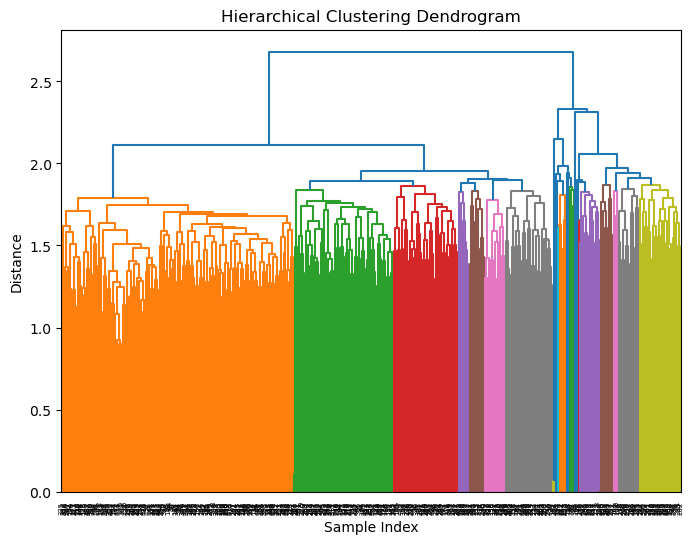

Cluster Labels: [24 29  1 20  1  1  1  4  1  3 25  1  5  4  3  3  8  5  3  1 19  3  1  5
  3 20  1  1  1  1  9  5  1  1  9  3  3  9  1  4  4  1  3  1 29  9  7 30
  1 26  1  5 15  9  3  5  1  1  1 29 27  1  1 14  4 11 25  3  1 29  1  1
  1  1 27  7  1  2  1  1  1  9  3  8  5  5  5  1 26  1  5  3 16  1  3  1
  1  1  1  1  1 24  5  1 24  1  3  5  1 20  1  5  5  1  1  1 29  1  1  6
  8  1  1  1  3  6  1 11  3  8 28  8  1  3 20  3  4  3  9  1 24  1  5  3
  1  1  3  1  1  1  3  3  3  9  1  8  8  1 17  4  3 28 29  4  9  5  1  3
  3 21 25  3 27  7  9 19  1  1  1  1  5  1 10 26  5  7 26  1 22  1 20  1
  1  3 28  1 29  1  1  1  1  3 29  1 22  1  2  9 25  3  1  3  5  3 20  9
  3  5  9 20  1  1 27 28 20 29  3 12 28  1  8  9 12  7  9  1 29  1 12 25
  3  1  8  4  3 20  9  1  8  3 22  1  8  5  1  9  6  3  8  5  6 28  5 26
 12  5  1 27  3 29 12  9 20  1  3  3  7  1  4 20  1  1  3  1  1  3  1  1
  5 20  1  1 20  9 29 29  1  3  3  9  1  3  5 15 29 27  1 14  1  1  8  3
  1  1  5  1  5  1  1  3  5  1 29  

,Unnamed: 0,organization name,num employees,founded date,description,industries,headquarters location,description.1,cb rank,postal code,...,num of sub org,industry groups,total funding amt,company type,estimated rev,description_all,industries_parsed,generated_description,openai_embedding,cluster_label
20738,20738,Advoria,1-10,2023-08-29,Advoria's online appointment booking for law f...,"Artificial Intelligence (AI), Legal, Legal Tec...","Berlin, Berlin, Germany",Online appointment booking for the successful ...,"239,244",10967,...,—,"Artificial Intelligence (AI), Data and Analyti...",—,For Profit,—,Advoria's online appointment booking for law f...,"['Legal', 'Legal Tech', 'SaaS', 'Software']",Advoria provides an online appointment booking...,"[0.0007229680777527392, 0.0038898284547030926,...",24
19859,19859,Petville Global,1-10,2023-05-01,Petville Global: a B2B CRM SaaS platform + vet...,"Information Technology, Pet, Veterinary","Kuala Lumpur, Kuala Lumpur, Malaysia",B2B CRM SaaS platform that helps pet businesse...,—,—,...,—,"Community and Lifestyle, Health Care, Informat...","MYR15,000",For Profit,—,Petville Global: a B2B CRM SaaS platform + vet...,"['Information Technology', 'Pet', 'Veterinary']",Petville Global is a B2B CRM SaaS platform tha...,"[-0.05753791332244873, -0.006329794880002737, ...",29
18043,18043,InputAI,1-10,2023-01-01,—,Artificial Intelligence (AI),—,1000+ AI templates with OpenAI GPT and ChatGPT,"503,337",—,...,—,"Artificial Intelligence (AI), Data and Analyti...",—,For Profit,—,— 1000+ AI templates with OpenAI GPT and ChatGPT,[],InputAI is an advanced platform that offers ov...,"[-0.029991688206791878, -0.014825183898210526,...",1
22241,22241,Thunder,1-10,2024-02-02,Thunder is a Cloud computing to democratize ac...,"Artificial Intelligence (AI), Cloud Computing,...","Lewes, Delaware, United States",Thunder is a Cloud computing to democratize ac...,—,19958,...,—,"Artificial Intelligence (AI), Blockchain and C...",—,For Profit,—,Thunder is a Cloud computing to democratize ac...,"['Cloud Computing', 'Data Center', 'Informatio...","Thunder is a decentralized, peer-to-peer cloud...","[-0.05050375312566757, -0.027182575315237045, ...",20
19551,19551,Tail and Skew,1-10,2023-04-01,Tail & Skew builds an AI agent to automate tasks.,"Artificial Intelligence (AI), Financial Servic...","San Francisco, California, United States",Tail & Skew builds an AI agent to automate tasks.,"378,106",—,...,—,"Artificial Intelligence (AI), Data and Analyti...",—,For Profit,—,Tail & Skew builds an AI agent to automate tas...,"['Financial Services', 'FinTech', 'Machine Lea...",Tail and Skew is a technology company that spe...,"[0.0017154619563370943, -0.033890511840581894,...",1


In [314]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
import seaborn as sns

# Convert embeddings column to a numpy array
embeddings = np.array(sample_df['openai_embedding'].tolist())

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings)

# Display the similarity matrix
print("Cosine Similarity Matrix:")
print(similarity_matrix)

# Convert cosine similarity to cosine distance
distance_matrix = 1 - similarity_matrix

# Perform hierarchical clustering using the distance matrix
linkage_matrix = linkage(distance_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, labels=np.arange(len(embeddings)))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Extract cluster labels (e.g., for 2 clusters)
cluster_labels = fcluster(linkage_matrix, t=30, criterion='maxclust')
print("Cluster Labels:", cluster_labels)

# Add cluster labels to the DataFrame using .loc
sample_df.loc[:, 'cluster_label'] = cluster_labels



# Display the DataFrame with the new cluster labels
sample_df.head()


In [315]:
vals = sample_df[sample_df["cluster_label"]==3][["organization name","generated_description"]]
for index, row in vals.iterrows():
    print(f"Organization Name: {row['organization name']}")
    print(f"Generated Description: {row['generated_description']}\n")

Organization Name: Doppler
Generated Description: Doppler is an innovative platform that allows users to create an AI clone of themselves in just 5 minutes, transforming them into a chatbot for enhanced fan engagement. This service provides a unique opportunity for users to monetize their AI doppelgänger, offering fans VIP access to their paid AI clone.

Organization Name: Wave Predict
Generated Description: Wave Predict is an AI-powered trading assistant designed to provide users with predictive analytics for informed investment decisions. The platform leverages artificial intelligence to analyze market trends and generate accurate forecasts, helping both novice and experienced traders optimize their trading strategies.

Organization Name: Apptify
Generated Description: Apptify.ai is an innovative platform that leverages the ubiquity of WhatsApp to transform customer engagement for businesses. It provides advanced WhatsApp Business Solutions that enhance customer interactions, streaml

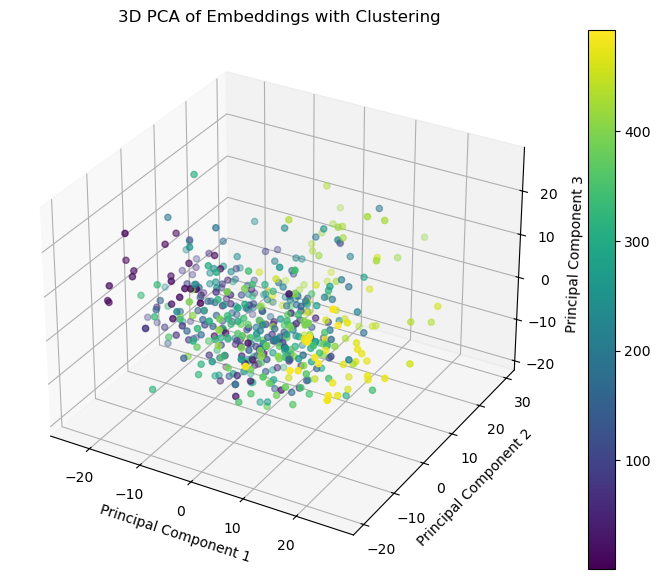

In [336]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Convert embeddings column to a numpy array
embeddings = np.array(sample_df['openai_embedding'].tolist())
cluster_labels = sample_df["cluster_label"]
# Standardize the embeddings (optional but recommended)
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings_scaled)

# Create a new DataFrame with the PCA results and cluster labels
pca_df = pd.DataFrame(data=embeddings_pca, columns=['PC1', 'PC2'])
pca_df['cluster_label'] = cluster_labels

# Plot the PCA results with cluster labels
plt.figure(figsize=(15, 6))
for label in np.unique(cluster_labels):
    subset = pca_df[pca_df['cluster_label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {label}')
plt.title('PCA of Embeddings with Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Display the DataFrame with the new cluster labels
print(sample_df)


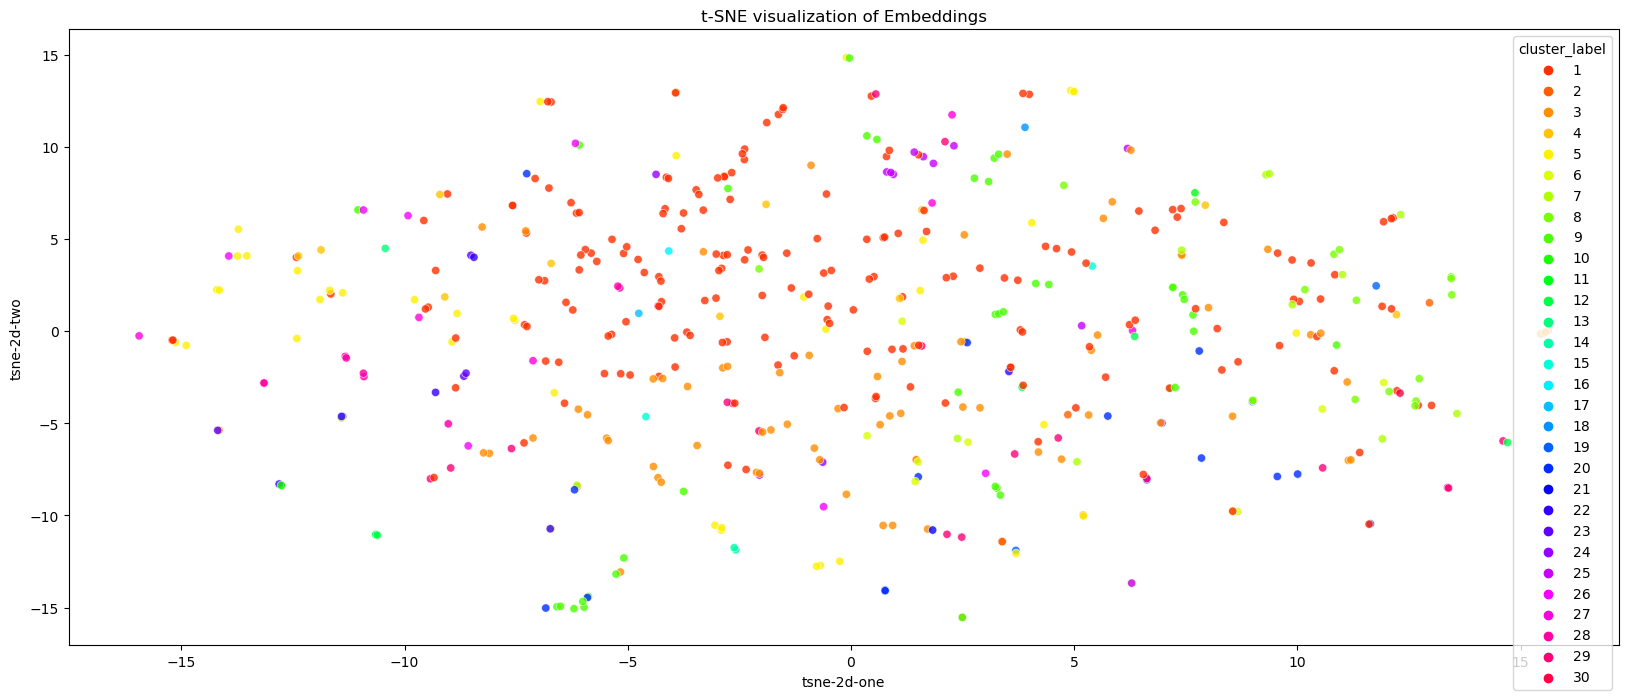

In [317]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
#probably that one point would pick another point to be close to it
embeddings = np.vstack(sample_df['openai_embedding'].values)

# Apply t-SNE to the embeddings
tsne = TSNE(n_components=2, perplexity=10, n_iter=300)
tsne_results = tsne.fit_transform(embeddings)

# Add t-SNE results to the DataFrame
sample_df['tsne-2d-one'] = tsne_results[:, 0]
sample_df['tsne-2d-two'] = tsne_results[:, 1]

# Plotting the t-SNE result with labels
plt.figure(figsize=(20, 8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_label",
    palette=sns.color_palette("hsv", len(sample_df['cluster_label'].unique())),
    data=sample_df,
    legend="full",
    alpha=0.8
)
plt.title('t-SNE visualization of Embeddings')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



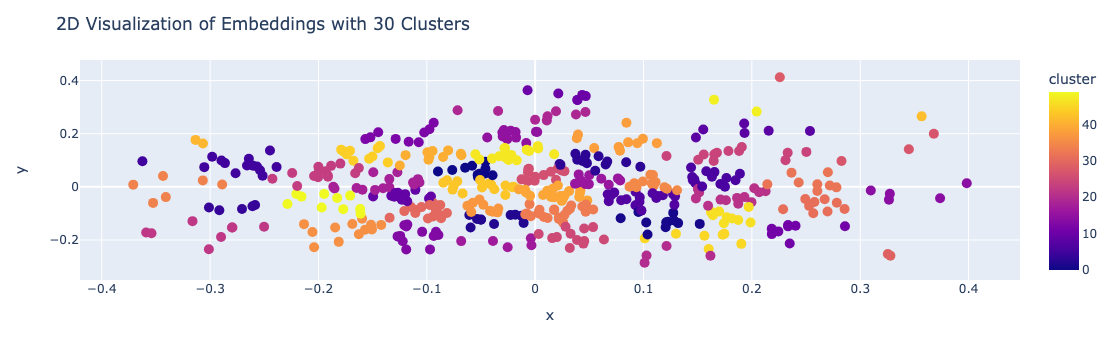

In [332]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import plotly.express as px

# Reduce dimensions for visualization
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(np.array(sample_df['openai_embedding'].tolist()))

# Apply K-means clustering to form 30 clusters
kmeans = KMeans(n_clusters=50, random_state=42)
clusters = kmeans.fit_predict(embeddings_2d)

# Prepare DataFrame for Plotly
plot_df = pd.DataFrame(embeddings_2d, columns=['x', 'y'])
plot_df['cluster'] = clusters  # Add cluster assignments to the DataFrame

# Plot using Plotly with clusters
fig = px.scatter(plot_df, x='x', y='y', color='cluster', hover_data=['cluster'])
fig.update_traces(marker_size=10)
fig.update_layout(title='2D Visualization of Embeddings with 30 Clusters', hovermode='closest')
fig.show()


In [335]:
vals = sample_df[sample_df["cluster_label"]==10][["organization name","generated_description"]]
for index, row in vals.iterrows():
    print(f"Organization Name: {row['organization name']}")
    print(f"Generated Description: {row['generated_description']}\n")

Organization Name: Singularico
Generated Description: Singularico is an AI-powered platform that scrutinizes your codebase for security vulnerabilities, offering insights on potential risks and misconfigurations. It integrates seamlessly into your development workflow, continuously updating its knowledge base with the latest threats, and provides a comprehensive report with recommendations on how to address identified issues.

Organization Name: SERV
Generated Description: SERV is a SaaS and AI-powered platform designed to streamline online sales and customer relationship management for home service providers. It offers AI-enhanced messaging and business automation tools, simplifying the process for contractors and service professionals to sell home, personal, and commercial services online.

Organization Name: 10pct.
Generated Description: 10pct. is a Japan-based company that leverages artificial intelligence to enhance the hospitality industry, specifically by improving hotel service

In [330]:
sample_df.loc[:, 'cluster_label'] = clusters

In [ ]:
10pct. is a Japan-based company that leverages artificial intelligence to enhance the hospitality industry, specifically by improving hotel services and boosting the attractiveness of tourist destinations. Their AI systems are designed to streamline operations, increase customer satisfaction, and ultimately drive business growth in the hotel sector.

    
What jobs/tasks would this automate? List of 5 (10 words max each)

